In [50]:
import tensorflow as tf
import numpy as np
np.random.seed(0)

from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

# Blobs
We now create a toy dataset with two classes that are easily distinguishable.

In [51]:
X, Y = datasets.make_blobs(n_samples=1000, n_features=2, centers=2, random_state=7)
n_obs, n_attr = X.shape
y_dim = 1
Y = Y.reshape((n_obs,y_dim))

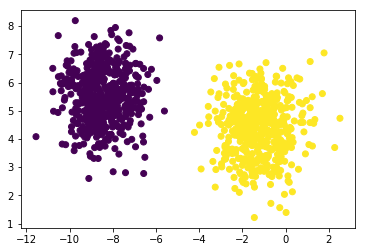

In [52]:
plt.scatter(*X.T, c=Y.ravel())

Fill in the following function to partition the data into a training set and a test set. You should shuffle the dataset before splitting it.

In [53]:
def train_test_split(X, Y, split_ratio):
    n_attr = len(X)
    split_point = int(n_attr * split_ratio)
    perm = np.random.permutation(n_attr)
    
    X_shuffle = X[perm]
    Y_shuffle = Y[perm]
    # Replace this part with your code
    X_train = X_shuffle[0:split_point]
    Y_train = Y_shuffle[0:split_point]
    X_test = X_shuffle[split_point:]
    Y_test = Y_shuffle[split_point:]
    
    return X_train, Y_train, X_test, Y_test

In [59]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, split_ratio=0.8)

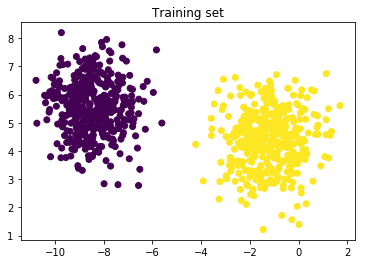

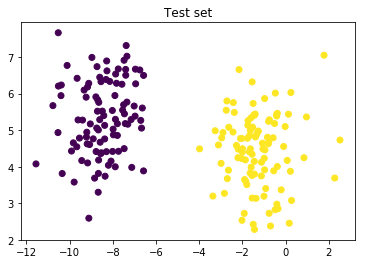

In [55]:
plt.figure()
plt.title('Training set')
plt.scatter(*X_train.T, c=Y_train.ravel())

plt.figure()
plt.title('Test set')
plt.scatter(*X_test.T, c=Y_test.ravel())

# Logistic regression
Write your TensorFlow code to perform (linear) logistic regression.

In [60]:
tf.reset_default_graph()
# X_in and Y_in are filled at runtime
x = tf.placeholder(tf.float32, [None, n_attr], name='X')
y = tf.placeholder(tf.float32, [None, y_dim], name='Y')

# These are learnable parameters. We randomly initialize W from a Gaussian distribution.
W = tf.Variable(tf.random.normal([n_attr, y_dim], stddev=0.01), name='W')
b = tf.Variable(tf.zeros([1]), name='b')

logits = tf.matmul(x, W) + b
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
pred = tf.nn.sigmoid(logits)
accuracy = tf.reduce_mean(tf.cast(tf.equal(logits > 0, tf.cast(y, tf.bool)), tf.float32))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

In [65]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

summary_writer = tf.summary.FileWriter('train/linear_blobs', session.graph)

tf.summary.scalar(name='train_loss', tensor=loss)
tf.summary.scalar(name='train_accuracy', tensor=accuracy)

summary_op = tf.summary.merge_all()

# Run for 1000 epochs
for epoch in range(1000):
    _, loss_value, accuracy_value, summary_str = session.run([train_op, loss, accuracy, summary_op],
                                                feed_dict={x: X_train, y: Y_train})
    summary_writer.add_summary(summary_str, epoch)
    if (epoch+1) % 100 == 0:
        print('[Epoch {}] loss: {} - train accuracy: {}'.format(epoch+1, loss_value, accuracy_value))

print("Final W: {}".format(session.run(W)))
print("Final b: {}".format(session.run(b)))

[Epoch 100] loss: 0.0639199316502 - train accuracy: 0.988749980927
[Epoch 200] loss: 0.0462359413505 - train accuracy: 0.991249978542
[Epoch 300] loss: 0.0391822084785 - train accuracy: 0.991249978542
[Epoch 400] loss: 0.0351868718863 - train accuracy: 0.993749976158
[Epoch 500] loss: 0.0325338132679 - train accuracy: 0.993749976158
[Epoch 600] loss: 0.0306017547846 - train accuracy: 0.993749976158
[Epoch 700] loss: 0.0291068814695 - train accuracy: 0.993749976158
[Epoch 800] loss: 0.0278996285051 - train accuracy: 0.993749976158
[Epoch 900] loss: 0.0268930979073 - train accuracy: 0.993749976158
[Epoch 1000] loss: 0.0260330494493 - train accuracy: 0.993749976158
Final W: [[2.2454402]
 [1.834818 ]]
Final b: [1.3811954]


In [66]:
test_data = {x: X_test, y: Y_test}
test_output = [accuracy]
accuracy_value = session.run(test_output, feed_dict=test_data)
print('Test accuracy: {}'.format(accuracy_value))

Test accuracy: [0.995]


### Viz

To plot the decision boundary, we provide a function to generate an evenly-spaced grid. Your goal here is to classify each point of the grid.

In [13]:
def sample_grid(data, resolution=100):
    x = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), resolution)
    y = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), resolution)
    X, Y = np.meshgrid(x, y)
    output = np.stack((X, Y), axis=2)
    return output

In [82]:
grid = sample_grid(X)
grid_flattened = grid.reshape(-1, 2)

# Fill this part
ypred = session.run([pred], feed_dict={x: grid_flattened})

# Reshape to match grid dimensions
predictions = ypred[0].reshape(grid.shape[0], grid.shape[1])

In [84]:
grid.shape

(100, 100, 2)

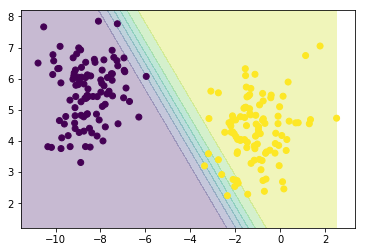

In [83]:
plt.contourf(grid[:, :, 0], grid[:, :, 1], predictions, alpha=0.3)
plt.scatter(*X_test.T, c=Y_test.ravel())

# Circles
We now switch to a (slightly) more complicated dataset.

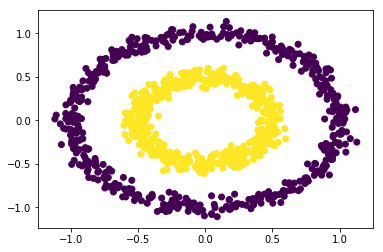

In [92]:
X, Y = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)
n_obs, n_attr = X.shape
y_dim = 1
Y = Y.reshape((n_obs,y_dim))
plt.scatter(*X.T, c=Y.ravel())

In [93]:
# Split the dataset
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, split_ratio=0.8)

In [94]:
tf.reset_default_graph()
# X_in and Y_in are filled at runtime
x = tf.placeholder(tf.float32, [None, n_attr], name='X')
y = tf.placeholder(tf.float32, [None, y_dim], name='Y')

# These are learnable parameters. We randomly initialize W from a Gaussian distribution.
W = tf.Variable(tf.random.normal([n_attr, y_dim], stddev=0.01), name='W')
b = tf.Variable(tf.zeros([1]), name='b')

logits = tf.matmul(x, W) + b
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
pred = tf.nn.sigmoid(logits)
accuracy = tf.reduce_mean(tf.cast(tf.equal(logits > 0, tf.cast(y, tf.bool)), tf.float32))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

In [95]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

summary_writer = tf.summary.FileWriter('train/linear_blobs', session.graph)

tf.summary.scalar(name='train_loss', tensor=loss)
tf.summary.scalar(name='train_accuracy', tensor=accuracy)

summary_op = tf.summary.merge_all()

# Run for 1000 epochs
for epoch in range(1000):
    _, loss_value, accuracy_value, summary_str = session.run([train_op, loss, accuracy, summary_op],
                                                feed_dict={x: X_train, y: Y_train})
    summary_writer.add_summary(summary_str, epoch)
    if (epoch+1) % 100 == 0:
        print('[Epoch {}] loss: {} - train accuracy: {}'.format(epoch+1, loss_value, accuracy_value))

print("Final W: {}".format(session.run(W)))
print("Final b: {}".format(session.run(b)))

[Epoch 100] loss: 0.693035423756 - train accuracy: 0.384999990463
[Epoch 200] loss: 0.693018496037 - train accuracy: 0.435000002384
[Epoch 300] loss: 0.693015158176 - train accuracy: 0.446249991655
[Epoch 400] loss: 0.693014383316 - train accuracy: 0.449999988079
[Epoch 500] loss: 0.693014085293 - train accuracy: 0.449999988079
[Epoch 600] loss: 0.693014144897 - train accuracy: 0.452499985695
[Epoch 700] loss: 0.693014144897 - train accuracy: 0.452499985695
[Epoch 800] loss: 0.693014144897 - train accuracy: 0.452499985695
[Epoch 900] loss: 0.693014085293 - train accuracy: 0.452499985695
[Epoch 1000] loss: 0.693014085293 - train accuracy: 0.452499985695
Final W: [[-0.01919654]
 [-0.04819226]]
Final b: [-0.01494288]


Now train the same model as before on the new dataset

...and plot the decision boundary:

In [96]:
grid = sample_grid(X)
grid_flattened = grid.reshape(-1, 2)

# Fill this part
ypred = session.run([pred], feed_dict={x: grid_flattened})

# Reshape to match grid dimensions
predictions = ypred[0].reshape(grid.shape[0], grid.shape[1])

In [98]:
predictions.shape

(100, 100)

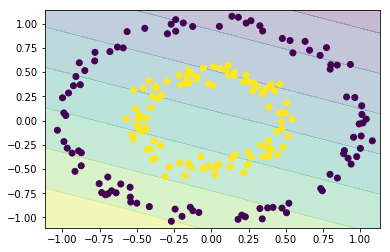

In [99]:
plt.contourf(grid[:, :, 0], grid[:, :, 1], predictions, alpha=0.3)
plt.scatter(*X_test.T, c=Y_test.ravel())

Does it work?
* No, the linear model is not equipped to handle non-linear problems such as the one of the circle, which could for example be solved using eucliean norm from center.

# Non-linear classification with a neural network
Add a hidden layer to your previous model and train it again.
You should also experiment with different numbers of neurons in the hidden layer, as well as different activation functions (we suggest trying at least sigmoid and ReLU).

In [101]:
n_attr, n_obs

(2, 1000)

In [123]:
tf.reset_default_graph()
# X_in and Y_in are filled at runtime
x = tf.placeholder(tf.float32, [None, n_attr], name='X')
y = tf.placeholder(tf.float32, [None, y_dim], name='Y')

# Hidden layer (input -> 100 units)
# ReLU activation function
num_hidden_units = 100
W1 = tf.Variable(tf.random.normal([n_attr, num_hidden_units], stddev=0.01), name='W1')
b1 = tf.Variable(tf.zeros([num_hidden_units]), name='b1')
hidden = tf.nn.relu(tf.matmul(x, W1) + b1)

# Output layer (100 units -> 1 unit)
W2 = tf.Variable(tf.random.normal([num_hidden_units, y_dim], stddev=0.01), name='W2')
b2 = tf.Variable(tf.zeros([y_dim]), name='b2')
logits = tf.matmul(hidden, W2) + b2
pred = tf.nn.sigmoid(logits)

# Calculate metrics (accuracy and loss)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
accuracy = tf.reduce_mean(tf.cast(tf.equal(logits > 0, tf.cast(y, tf.bool)), tf.float32))

# Set optimization strategy
all_weights = tf.trainable_variables() # all vars of your graph
regularization_penalty = tf.contrib.layers.apply_regularization(L1_reg, all_weights)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

In [124]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

summary_writer = tf.summary.FileWriter('train/linear_blobs', session.graph)

tf.summary.scalar(name='train_loss', tensor=loss)
tf.summary.scalar(name='train_accuracy', tensor=accuracy)

summary_op = tf.summary.merge_all()

inputs = {x: X_train, y: Y_train}
outputs = [train_op, loss, accuracy, summary_op]

# Run for 1000 epochs
for epoch in range(1000):
    _, loss_value, accuracy_value, summary_str = session.run(outputs, feed_dict=inputs)
    summary_writer.add_summary(summary_str, epoch)
    if (epoch+1) % 100 == 0:
        print '[Epoch %i] loss: %.3f - train accuracy: %.3f' % (epoch+1, loss_value, accuracy_value)

[Epoch 100] loss: 0.693 - train accuracy: 0.504
[Epoch 200] loss: 0.692 - train accuracy: 0.504
[Epoch 300] loss: 0.690 - train accuracy: 0.504
[Epoch 400] loss: 0.686 - train accuracy: 0.586
[Epoch 500] loss: 0.677 - train accuracy: 0.694
[Epoch 600] loss: 0.661 - train accuracy: 0.819
[Epoch 700] loss: 0.631 - train accuracy: 0.930
[Epoch 800] loss: 0.583 - train accuracy: 0.993
[Epoch 900] loss: 0.515 - train accuracy: 1.000
[Epoch 1000] loss: 0.435 - train accuracy: 1.000


Plot the decision boundary. Does it work?
* Yes, the hidden layer adds non-linearity to the model, which allows it to predict data with a 100% trainining acc.

In [125]:
grid = sample_grid(X)
grid_flattened = grid.reshape(-1, 2)

# Fill this part
ypred = session.run([pred], feed_dict={x: grid_flattened})

# Reshape to match grid dimensions
predictions = ypred[0].reshape(grid.shape[0], grid.shape[1])

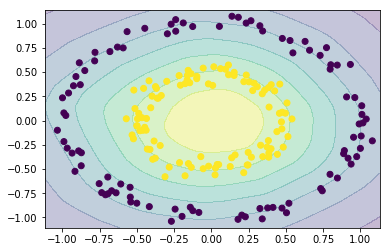

In [126]:
plt.contourf(grid[:, :, 0], grid[:, :, 1], predictions, alpha=0.3)
plt.scatter(*X_test.T, c=Y_test.ravel())

# Stochastic gradient descent
In the previous experiments, you instructed TensorFlow to compute the gradient across the full dataset. Most neural network approaches train using *mini-batches*, i.e. small subsets of the training set.

Rewrite the previous training code to perform stochastic gradient descent (SGD) instead of batch gradient descent. Try various batch sizes (e.g. 16, 32, 64) and see how the loss evolves.

What are the advantages of SGD of batch GD? What are some potential drawbacks?

### SGD (robust, but expensive)
* Calculates the error and updates the model for each example in the training dataset.

Upsides
* The frequent updates immediately give an insight into the performance of the model and the rate of improvement.
* This variant of gradient descent may be the simplest to understand and implement, especially for beginners.
* The increased model update frequency can result in faster learning on some problems.
* The noisy update process can allow the model to avoid local minima (e.g. premature convergence).

Downsides
* Updating the model so frequently is more computationally expensive 
* The frequent updates can result in a noisy gradient signal, which may cause the model parameters and in turn the model error to jump around 
    * (have a higher variance over training epochs).
* The noisy learning process down the error gradient can also make it hard for the algorithm to settle on an error minimum for the model.


### Batch Gradient Descent (efficient, but can be inaccurate)
* Calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.
* One cycle through the entire training dataset is called a training epoch. 
* Batch gradient descent performs model updates at the end of each training epoch

Upsides
* Fewer updates to the model, i.e. more computationally efficient than SGD.
* Low update frequency, i.e. more stable error gradient and likely more stable convergence.
* Separation of the calculation of prediction errors and the model update
    * Ideal for processing in parallel
    
Downsides
* Premature convergence, with less optimal set of parameters, due to stable error gradient.
* Updates at the end of the training epoch require the accumulation of prediction errors across all training examples.
* Often requires the entire training dataset **in memory** and available to the algorithm.
* Model updates/training speed being slow for large datasets.

Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

Implementations may choose to sum the gradient over the mini-batch or take the average of the gradient which further reduces the variance of the gradient.

### Mini-batch gradient descent (balanced)
* Balanced approach between the robustness of SGD and the efficiency of BGD. 
* Most common implementation of GD used in deep learning.

Upsides
* High model update frequency, compared to BGD, leads to robust convergence, avoiding local minima.
* Batched updates are highly computationally efficient (compared to SGD). 
* Batching allows both the efficiency of not having all training data in memory and algorithm implementations.

Downsides
* Mini-batch requires an additional *mini-batch size* hyperparameter.
* Error info must be accumulated across mini-batches of training examples like BGD.

#### How to MBGD
* Mini-batch sizes are often tuned to an aspect of the computational architecture on which the implementation is being executed. 
* Such as a power of two that fits the memory requirements of the GPU or CPU hardware like 32, 64, 128, 256, and so on.
* *Small values*: Quick convergence, at the cost of noisy gradient in the training process.
* *Large values*: Slow congergence, accurate estimates of the error gradient.

In [ ]:
# Code